# Анализ базы ресторанов

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Чтение базы

In [2]:
data_rest = pd.read_csv('restaurant.csv', index_col='id_restaurant')
data_dishes = pd.read_csv('dishes.csv')
data_rest_dishes = pd.read_csv('dishes_restaurant.csv')
data_products = pd.read_csv('products.csv')
data_products_dishes = pd.read_csv('dishes_products.csv')
data_employ = pd.read_csv('employees.csv')
data_hist_prod = pd.read_csv('history_products.csv')
data_order = pd.read_csv('orders.csv')
data_order_dish = pd.read_csv('dishes_order.csv')

In [3]:
data_rest['opening_date'] = pd.to_datetime(data_rest['opening_date'])

In [4]:
data_rest_numeric = data_rest.select_dtypes(include=['float64', 'int64'])
data_rest_numeric['open_year'] = data_rest['opening_date'].dt.year
data_rest_numeric = data_rest_numeric.drop(columns='house')
data_rest_numeric

,markup,open_year
id_restaurant,,
1,5.72,1967
2,9.74,1925
3,3.15,1936
4,1.52,1917
5,9.58,1901
...,...,...
96,5.29,2008
97,3.95,1976
98,2.47,2008


# Гипотеза 1: рестораны, открытые в середине 20 века до сих пор работают

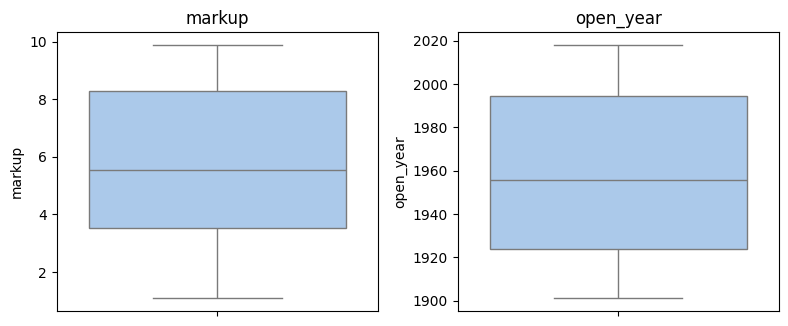

In [5]:
# BoxPlot
num_columns = 4
num_rows = (len(data_rest_numeric) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 4, num_rows * 3))
palette = sns.color_palette("pastel")

for i, column in enumerate(data_rest_numeric):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxplot(y=data_rest_numeric[column], color=palette[0])
    plt.title(column)
    
plt.tight_layout()
plt.show()

## Большинство ресторанов отрылись с 1920 по 2000 год

# Гипотеза 2: цена блюда зависит от принадлежности к кухне

In [6]:
data_dishes.head()

,id_dishes,name,cuisine,price
0,1,Cobb Salad,American,1194.52
1,2,Reuben Sandwich,American,1497.51
2,3,Fried Green Tomatoes,American,681.99
3,4,Chicago Hot Dog,American,1506.58
4,5,Clam Chowder,American,1740.64


In [7]:
data_dishes['cuisine'].value_counts()

cuisine
Korean      20
Indian      20
Japanese    19
American    15
Russian     13
Mexican     13
Name: count, dtype: int64

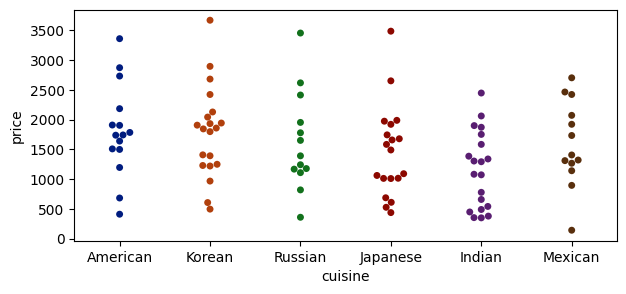

In [8]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(7, 3))

fig = sns.swarmplot(
    data_dishes,
    x='cuisine',
    y='price',
    palette='dark',
    size=5
)

plt.show()

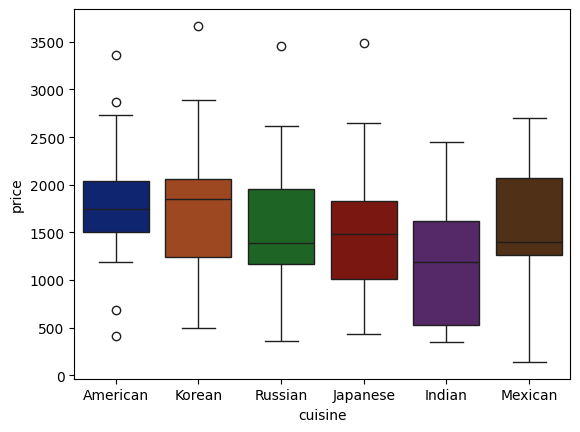

In [9]:
fig = sns.boxplot(
    data_dishes,
    x='cuisine',
    y='price',
    palette='dark'
)
plt.show()

## Преимущественно самые дорогие блюда встречаются в Корейской кухне, а в Индийской кухне самый большой разброс цен, при этом там самая низкая медианная цена

# Гипотеза 3.1: существуют продукты, часто встречающиеся в большинстве блюд

In [10]:
data_products.head()

,id_products,name,price,id_supplier
0,1,Salo,96.07,58
1,2,Sweet Potato,50.95,28
2,3,Fig,27.02,16
3,4,Ginger,96.44,19
4,5,Pumpkin,18.38,54


In [11]:
data_products_dishes.head()

,id,id_dishes,id_products,weight_product
0,1,1,3,88.055868
1,2,1,11,71.910230
2,3,1,13,77.255176
3,4,1,28,75.625184
4,5,1,40,4.070043


In [12]:
data_dishes.head()

,id_dishes,name,cuisine,price
0,1,Cobb Salad,American,1194.52
1,2,Reuben Sandwich,American,1497.51
2,3,Fried Green Tomatoes,American,681.99
3,4,Chicago Hot Dog,American,1506.58
4,5,Clam Chowder,American,1740.64


In [13]:
products_dishes = pd.merge(data_products_dishes, data_dishes, on='id_dishes', how='inner')
products_dishes = pd.merge(products_dishes, data_products, on='id_products', how='inner')
products_dishes.head()

,id,id_dishes,id_products,weight_product,name_x,cuisine,price_x,name_y,price_y,id_supplier
0,1,1,3,88.055868,Cobb Salad,American,1194.52,Fig,27.02,16
1,2,1,11,71.910230,Cobb Salad,American,1194.52,Cantaloupe,93.26,6
2,3,1,13,77.255176,Cobb Salad,American,1194.52,Octopus,7.62,39
3,4,1,28,75.625184,Cobb Salad,American,1194.52,Lentils,98.59,60
4,5,1,40,4.070043,Cobb Salad,American,1194.52,Pineapple,45.74,64


In [14]:
products_dishes = products_dishes.rename(columns={'name_y': 'name_prod'})
products_dishes = products_dishes.rename(columns={'name_x': 'name_dish'})
products_dishes = products_dishes.rename(columns={'price_y': 'price_prod'})
products_dishes = products_dishes.rename(columns={'price_x': 'price_dish'})
products_dishes.head()

,id,id_dishes,id_products,weight_product,name_dish,cuisine,price_dish,name_prod,price_prod,id_supplier
0,1,1,3,88.055868,Cobb Salad,American,1194.52,Fig,27.02,16
1,2,1,11,71.910230,Cobb Salad,American,1194.52,Cantaloupe,93.26,6
2,3,1,13,77.255176,Cobb Salad,American,1194.52,Octopus,7.62,39
3,4,1,28,75.625184,Cobb Salad,American,1194.52,Lentils,98.59,60
4,5,1,40,4.070043,Cobb Salad,American,1194.52,Pineapple,45.74,64


In [15]:
products_dishes['name_prod'].value_counts()

name_prod
Jalapeño          77
Brown Rice        76
Blackberries      70
Tomatoes          68
Almonds           67
                  ..
Water Chestnut     6
Maple Syrup        6
Cherries           6
Sardines           5
Pork               4
Name: count, Length: 100, dtype: int64

In [16]:
products_dishes.isna().sum()

id                0
id_dishes         0
id_products       0
weight_product    0
name_dish         0
cuisine           0
price_dish        0
name_prod         0
price_prod        0
id_supplier       0
dtype: int64

In [17]:
order = products_dishes.groupby('name_prod')['name_dish'].count().sort_values(ascending=False).index
top_10_order = order[:10]

fig1 = px.histogram(
    products_dishes[products_dishes['name_prod'].isin(top_10_order)],
    y='name_dish',
    x='name_prod',
    histfunc='count',
    #orientation='h',
    labels={'name_prod': 'Название продукта'},
    category_orders={'name_prod': top_10_order},
    title='Топ 10 самых ЧАСТО встречающихся продуктов',
)
fig1.show()

last_10_order = order[-10:]
fig2 = px.histogram(
    products_dishes[products_dishes['name_prod'].isin(last_10_order)],
    y='name_dish',
    x='name_prod',
    histfunc='count',
    #orientation='h',
    labels={'name_prod': 'Название продукта'},
    category_orders={'name_prod': last_10_order},
    title='Топ 10 самых РЕДКО встречающихся продуктов',
)
fig2.show()


# Гипотеза 3.2: Продукты, часто втречающиеся в блюдах являются довольно универсальными для приготовления блюд во всех кухнях. 
Проверим эту гипотезу


In [18]:
import plotly.express as px
import pandas as pd

pivot_flights = products_dishes.pivot_table(
    index='cuisine',
    columns='name_prod',
    aggfunc='size',
    fill_value=0
)

fig = px.imshow(
    pivot_flights,
    labels=dict(x="Продукты", y="Кухни", color="Частота"),
    x=pivot_flights.columns,
    y=pivot_flights.index,
    color_continuous_scale='YlGnBu',
    text_auto=True
)

fig.show()


In [19]:
print(f'часто встречающиеся продукты:\n {list(top_10_order)}')

часто встречающиеся продукты:
 ['Jalapeño', 'Brown Rice', 'Blackberries', 'Tomatoes', 'Almonds', 'Mangoes', 'Chia Seeds', 'Cauliflower', 'Rhubarb', 'Winter Squash']


## По тепловой диаграмме видно, что часто встречающие продукты являются универсальными для всех кухонь

# Гипотеза 4: зарплата зависит от должности и ресторана

In [20]:
data_employ.head()

,id_employees,firstname,surname,position,id_restaurant,salary,bonus_salary
0,1,Isabella,Johnson,waiter,42,97958,4344.64
1,2,Ethan,Walker,cook,54,42951,7721.26
2,3,James,Walker,manager,29,33818,7020.36
3,4,Ethan,Taylor,cook,86,58927,3829.25
4,5,Mason,Davis,waiter,75,54450,7295.77


In [21]:
data_rest.head()

,name,opening_date,open_time,close_time,markup,city,street,house
id_restaurant,,,,,,,,
1,Golden Plate,1967-08-29,12:00,21:00,5.72,Уфа,Южная Дорога,65
2,Old Table Place,1925-12-22,09:00,16:00,9.74,Оренбург,Советская Площадь,85
3,Sunny Fork,1936-04-20,11:00,18:00,3.15,Новокузнецк,Южная Переулок,54
4,Fresh Table,1917-06-21,13:00,22:00,1.52,Казань,Школьная Проспект,26
5,Sunny Diner Haven,1901-04-24,10:00,19:00,9.58,Казань,Садовая Шоссе,16


In [22]:
rest_empl = pd.merge(data_rest, data_employ, on='id_restaurant', how='inner')
rest_empl.head()

,id_restaurant,name,opening_date,open_time,close_time,markup,city,street,house,id_employees,firstname,surname,position,salary,bonus_salary
0,1,Golden Plate,1967-08-29,12:00,21:00,5.72,Уфа,Южная Дорога,65,32,Sophia,Walker,cook,78219,7409.11
1,1,Golden Plate,1967-08-29,12:00,21:00,5.72,Уфа,Южная Дорога,65,42,Sophia,Walker,waiter,95303,1002.55
2,1,Golden Plate,1967-08-29,12:00,21:00,5.72,Уфа,Южная Дорога,65,69,Mason,Brown,waiter,11530,4119.76
3,5,Sunny Diner Haven,1901-04-24,10:00,19:00,9.58,Казань,Садовая Шоссе,16,27,Ethan,Lewis,cook,92543,2435.28
4,6,Blue Chef Haven,1943-06-21,13:00,21:00,7.63,Самара,Речная Проспект,88,16,Isabella,Harris,cook,93071,3012.05


In [23]:
pivot_flights = rest_empl.pivot_table(
    index= 'position',
    columns='name',
    values='salary',
    aggfunc='mean',
    fill_value=0
)

fig = px.imshow(
    pivot_flights,
    labels=dict(x="Рестораны", y="Должности", color="Зарплата"),
    x=pivot_flights.columns,
    y=pivot_flights.index,
    color_continuous_scale='YlGnBu',
    text_auto=False
)

fig.show()

## Самые высокие зарплаты у официантов, при этом не видно явной кореляции между рестораном и заработком

# Гипотеза 5: У повышения цен на продукты есть сезонность

In [24]:
data_hist_prod.head()

,id_products,name,price,id_supplier,from_dt,to_dt
0,1,Salo,197.92,58,2023-11-05 09:00:00,2023-12-26 09:00:00
1,1,Salo,254.74,58,2023-12-26 09:00:00,2024-01-31 09:00:00
2,1,Salo,277.04,58,2024-01-31 09:00:00,2024-03-01 09:00:00
3,1,Salo,219.08,58,2024-03-01 09:00:00,2024-03-31 09:00:00
4,1,Salo,200.60,58,2024-03-31 09:00:00,2024-01-31 09:00:00


In [25]:
price_changes = data_hist_prod.groupby('id_products').size()

valid_ids = price_changes[price_changes >= 5].index
filtered_data = data_hist_prod[data_hist_prod['id_products'].isin(valid_ids)]

top_names = filtered_data['name'].value_counts().index[:15]
filtered_data = filtered_data[filtered_data['name'].isin(top_names)]

px.line(
    filtered_data,
    x='from_dt',
    y='price',
    color='name'
)

## Исходя из анализа повышения цен сезонность повышения цен для всех продуктов не наблюдается

# Гипотеза 6: Блюда какой-то из кухонь мира наиболее популярные во всех ресторанах

In [26]:
data_order.head()

,id_order,id_customer,id_employees,id_restaurant,status,updated_at,payment_type,total_amount
0,1,16,778,99,new,2024-07-18 20:34:19,cash,3865.08
1,2,48,95,15,new,2010-10-31 18:14:21,contactless,22270.75
2,3,35,778,60,ready,2021-08-09 14:58:16,card,25963.07
3,4,20,78,8,served,2013-03-24 12:02:54,card,3497.12
4,5,18,894,60,cancelled,2022-04-24 13:07:45,card,18225.87


In [27]:
data_order_dish.head()

,id,id_dishes,id_order,cnt_items
0,1,1,35,9
1,2,1,62,1
2,3,1,85,7
3,4,1,126,4
4,5,1,259,5


In [28]:
dish_order = pd.merge(data_order_dish, data_order, on='id_order', how='inner')
dish_order = pd.merge(data_dishes, dish_order, on='id_dishes', how='inner')
dish_order.head()

,id_dishes,name,cuisine,price,id,id_order,cnt_items,id_customer,id_employees,id_restaurant,status,updated_at,payment_type,total_amount
0,1,Cobb Salad,American,1194.52,1,35,9,6,574,48,ready,2011-03-01 23:00:12,qr_code,53683.14
1,1,Cobb Salad,American,1194.52,2,62,1,44,949,40,preparing,2020-07-11 02:59:01,cash,12490.24
2,1,Cobb Salad,American,1194.52,3,85,7,7,877,55,preparing,2017-11-19 03:23:46,contactless,0.00
3,1,Cobb Salad,American,1194.52,4,126,4,64,56,78,served,2017-10-11 14:20:42,card,1129.71
4,1,Cobb Salad,American,1194.52,5,259,5,26,301,52,cancelled,2014-12-20 20:08:29,contactless,0.00


In [29]:
order = dish_order.groupby('name')['cnt_items'].sum().sort_values(ascending=False).index

fig = px.histogram(
    dish_order,
    y='name',
    x='cnt_items',
    histfunc='sum',
    category_orders={'name':order},
    #orientation='h',
    title='Частота заказа блюд',
)
fig.show()

In [30]:
top_5_dishes = dish_order.groupby(['name', 'cuisine'])['cnt_items'].sum().sort_values(ascending=False).head(5).reset_index()

print("Топ 5 самых популярных блюд")
for index, row in top_5_dishes.iterrows():
    print(f"Блюдо: {row['name']}, Кухня: {row['cuisine']}, Заказы: {row['cnt_items']}")


Топ 5 самых популярных блюд
Блюдо: Kholodets, Кухня: Russian, Заказы: 97
Блюдо: Kvas, Кухня: Russian, Заказы: 90
Блюдо: Seledka Pod Shuboy, Кухня: Russian, Заказы: 89
Блюдо: Gyudon, Кухня: Japanese, Заказы: 86
Блюдо: Pirozhki, Кухня: Russian, Заказы: 86


Самыми популярными блюдами для заказа являются: Холодец, квас, селедка под шубой

При этом самыми редки блюдами являются: Темпура(ролл), Mole Poblano, Raita

## Самыми популярными блюдами являются блюда русской кухни